In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from IPython.display import clear_output
%matplotlib inline

In [4]:
batch_size = 64
updates = 40000
learning_rate = 0.01
noise_range = 5

In [5]:
tf.reset_default_graph()

In [6]:
gen_weights = dict()
gen_weights['w1'] = tf.Variable(tf.random_normal([1,5]))
gen_weights['b1'] = tf.Variable(tf.random_normal([5]))
gen_weights['w2'] = tf.Variable(tf.random_normal([5,1]))
gen_weights['b2'] = tf.Variable(tf.random_normal([1]))

disc_weights = dict()
disc_weights['w1'] = tf.Variable(tf.random_normal([1,10]))
disc_weights['b1'] = tf.Variable(tf.random_normal([10]))
disc_weights['w2'] = tf.Variable(tf.random_normal([10,10]))
disc_weights['b2'] = tf.Variable(tf.random_normal([10]))
disc_weights['w3'] = tf.Variable(tf.random_normal([10,1]))
disc_weights['b3'] = tf.Variable(tf.random_normal([1]))

z_p = tf.placeholder('float', [None, 1])
x_d = tf.placeholder('float', [None, 1])

g_h = tf.nn.softplus(tf.add(
           tf.matmul(z_p, gen_weights['w1']),gen_weights['b1']))
x_g = tf.add(tf.matmul(g_h, gen_weights['w2']), gen_weights['b2'])

def discriminator(x):
    d_h1 = tf.nn.tanh(tf.add(
        tf.matmul(x, disc_weights['w1']), disc_weights['b1']))
    d_h2 = tf.nn.tanh(tf.add(
        tf.matmul(d_h1, disc_weights['w2']),disc_weights['b2']))
#     score = tf.nn.sigmoid(tf.add(
#         tf.matmul(d_h2, disc_weights['w3']), disc_weights['b3']))

    score = tf.add(
        tf.matmul(d_h2, disc_weights['w3']), disc_weights['b3'])
    
    return score

x_data_score = discriminator(x_d)
x_gen_score = discriminator(x_g)

# D_cost = -tf.reduce_mean(tf.log(x_data_score) + tf.log(1.0 - x_gen_score))
# G_cost = tf.reduce_mean(tf.log(1.0 - x_gen_score))

D_plus_cost = tf.reduce_mean(tf.nn.relu(x_data_score) - x_data_score + tf.log(1.0 + tf.exp(-tf.abs(x_data_score))))
D_minus_cost = tf.reduce_mean(tf.nn.relu(x_gen_score) + tf.log(1.0 + tf.exp(-tf.abs(x_gen_score))))
G_cost = tf.reduce_mean(tf.nn.relu(x_gen_score) - x_gen_score + tf.log(1.0 + tf.exp(-tf.abs(x_gen_score))))
D_cost = D_plus_cost + D_minus_cost


optimizer = tf.train.GradientDescentOptimizer(learning_rate)
D_optimizer = optimizer.minimize(D_cost, var_list=list(disc_weights.values()))
G_optimizer = optimizer.minimize(G_cost, var_list=list(gen_weights.values()))

In [7]:
def sample_z(size=batch_size):
    return np.random.uniform(-noise_range, noise_range, size=[size,1])
def sample_x(size=batch_size):
    return np.random.normal(-2.5, 0.5, size=[size, 1])

In [8]:
sess = tf.Session()

In [9]:
init = tf.global_variables_initializer()
sess.run(init)

In [10]:
for i in range(updates):
    print('Update #{}'.format(i+1))
    clear_output(wait=True)
    z_batch = sample_z()
    x_batch = sample_x()
    sess.run(D_optimizer, feed_dict={z_p: z_batch, x_d: x_batch})
    z_batch = sample_z()
    sess.run(G_optimizer, feed_dict={z_p: z_batch})

Update #40000


In [11]:
out_data = x_g.eval(feed_dict={z_p: sample_z(10000)}, session=sess)

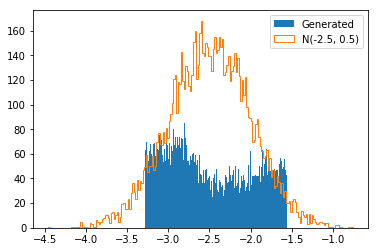

In [15]:
plt.hist(out_data, bins=200, label = 'Generated');
plt.hist(sample_x(10000), bins=200, histtype='step', label = 'N(-2.5, 0.5)');
plt.legend()